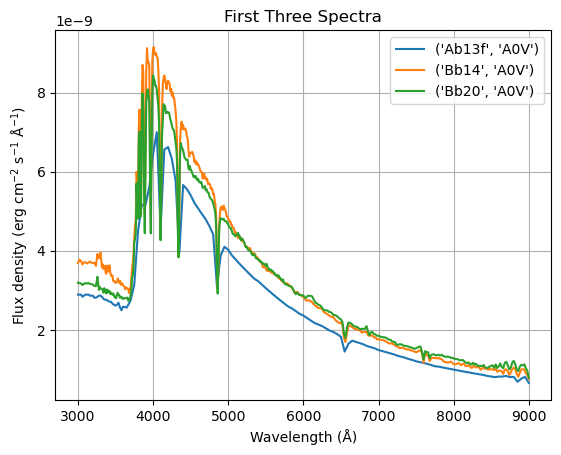

In [25]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import os
from astropy.io import fits
import pandas as pd


# Read the spectra_list
spectra_list = Table.read(fr"spectra_list.csv", format ="ascii.csv")


filenames = spectra_list['filename']
types = spectra_list['type']



spectra = [Table.read(fr"spectra\{filename}", format ="ascii.csv") for filename in filenames]


wavelengths_list = [data['wavelength'] for data in spectra]
fluxes_list = [data['flux'] for data in spectra]


# Loop through 
indices = np.linspace(0, len(filenames) - 1, 3, dtype=int)
#for i in indices:
for i in range(3):
    # Filter data where wavelength is between 3000 and 9000
    mask = (wavelengths_list[i] >= 3000) & (wavelengths_list[i] <= 9000)
    plt.plot(wavelengths_list[i][mask], fluxes_list[i][mask], label=(os.path.splitext(filenames[i])[0], types[i]))

# Adding labels and title
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux density (erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)')
plt.title('First Three Spectra')
plt.legend()  
plt.grid(True)

plt.savefig('First_Three_Spectra1.pdf', format='pdf')

# Show the plot
plt.show()

In [26]:
# Problem 2

print('An angstrom is 10^-10 m')
print('A unit is W/m^2 or a jansky.')

An angstrom is 10^-10 m
A unit is W/m^2 or a jansky.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


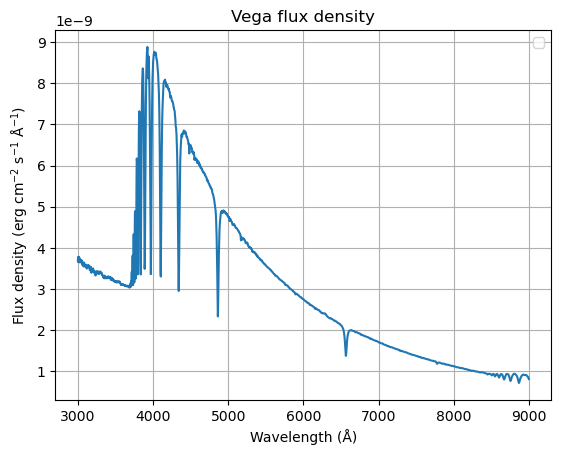

2.831857840725187e-06
5.616538099133372e-06
3.2782533051349564e-06
2.831857840725187e-06
5.616538099133372e-06
3.2782533051349564e-06
2.831857840725187e-06
5.616538099133372e-06
3.2782533051349564e-06
2.831857840725187e-06
5.616538099133372e-06
3.2782533051349564e-06
2.831857840725187e-06
5.616538099133372e-06
3.2782533051349564e-06
2.831857840725187e-06
5.616538099133372e-06
3.2782533051349564e-06
2.831857840725187e-06
5.616538099133372e-06
3.2782533051349564e-06
2.831857840725187e-06
5.616538099133372e-06
3.2782533051349564e-06
2.831857840725187e-06
5.616538099133372e-06
3.2782533051349564e-06
2.831857840725187e-06
5.616538099133372e-06
3.2782533051349564e-06
2.831857840725187e-06
5.616538099133372e-06
3.2782533051349564e-06
2.831857840725187e-06
5.616538099133372e-06
3.2782533051349564e-06
2.831857840725187e-06
5.616538099133372e-06
3.2782533051349564e-06
2.831857840725187e-06
5.616538099133372e-06
3.2782533051349564e-06
2.831857840725187e-06
5.616538099133372e-06
3.2782533051349564

In [27]:
# Problem 3

#data = fits.getdata("file.fits")



vega_path = fr'vega_fnu.csv'
#Notice: For this spectrum, the wavelength is given in nanometers and the flux density in erg cm-2 s-1 Hz-1.

def convert_flux_density(flux_vega, wavelength ):
    """Convert from erg cm^-2 s^-1 Hz^-1 to erg cm^-2 s^-1 Å^-1"""
    return flux_vega * (3e18 / wavelength**2)

def calculate_magnitude(star_flux, vega_flux):
    """Calculate the magnitude in a band."""
    return -2.5 * np.log10(star_flux / vega_flux)


vega_spectrum = Table.read(vega_path, format ="ascii.csv") 

vega_wavelength = vega_spectrum['wavelength'] * 10 # nanometers to angstrom
vega_flux_density = vega_spectrum['flux'] 

vega_converted_flux_density = convert_flux_density(vega_flux_density, vega_wavelength)


# Filter data where wavelength is between 3000 and 9000
mask = (vega_wavelength >= 3000) & (vega_wavelength <= 9000)
plt.plot(vega_wavelength[mask], vega_converted_flux_density[mask])

# Adding labels and title
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux density (erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)')
plt.title('Vega flux density')
plt.legend()  
plt.grid(True)




# Show the plot
plt.show()

# We see vega lines up decently with what we expect

# Now we need to integrate the flux density with the correct bounds for the different filters.
# U, B, V bands
filters = {
    'U': {'lambda_0': 3659, 'delta_lambda': 660, 'color': 'violet'},
    'B': {'lambda_0': 4582, 'delta_lambda': 940, 'color': 'blue' },
    'V': {'lambda_0': 5448, 'delta_lambda': 880, 'color': 'green'}
}


# Placeholder for the dictionary to store magnitudes
stars_data = {filename: {} for filename in filenames}

# Loop through each star

# Before we can use this, we must see that the steps are too large for these bounds. The steps between our measurements are 20, so we would first like to interpolatre this to get a more continious function.
for filename, star_type, wavelength, flux_density in zip(filenames,types, wavelengths_list, fluxes_list):
    star_magnitudes = {}
    
    for band, filter_data in filters.items():
        lambda_min = filter_data['lambda_0'] - filter_data['delta_lambda'] / 2
        lambda_max = filter_data['lambda_0'] + filter_data['delta_lambda'] / 2

        # Interpolate the flux within the B-band range
        band_wavelengths = np.linspace(lambda_min, lambda_max, 100)
        band_flux_density = np.interp(band_wavelengths, wavelength, flux_density)


        # Interpolate the flux within the B-band range
        band_vega_wavelengths = np.linspace(lambda_min, lambda_max, 100)
        band_vega_converted_flux_density = np.interp(band_wavelengths, vega_wavelength, vega_converted_flux_density)

        #plt.plot(band_wavelengths, band_flux_density, label=band, color=filter_data['color'])

        # Integrate flux over the wavelength range
        star_flux_integrated = np.trapz(band_flux_density, band_wavelengths)
        vega_flux_integrated = np.trapz(band_vega_converted_flux_density, band_vega_wavelengths)
        print(vega_flux_integrated)
        #print(star_flux_integrated, vega_flux_integrated)
        # Calculate magnitude
        magnitude = calculate_magnitude(star_flux_integrated, vega_flux_integrated)
        #print(f"{band}-band magnitude: {magnitude}")
        star_magnitudes[band] = magnitude

    # Store magnitudes in the dictionary
    stars_data[filename] = star_magnitudes



In [28]:


df = pd.DataFrame.from_dict(stars_data, orient='index')

df['type'] = types
# Calculate U-B and B-V
df['U-B'] = df['U'] - df['B']
df['B-V'] = df['B'] - df['V']


# Reorder columns to put 'type' first
columns_order = ['type', 'U', 'B', 'V', 'U-B', 'B-V']
df = df[columns_order]

print(df)

          type         U         B         V       U-B       B-V
Ab13f.csv  A0V  0.214637  0.202162  0.177296  0.012476  0.024865
Bb14.csv   A0V -0.071723 -0.039974 -0.006338 -0.031749 -0.033636
Bb20.csv   A0V  0.044165  0.034241 -0.005246  0.009924  0.039487
Ab14f.csv  A1V  0.631375  0.608933  0.577203  0.022443  0.031730
Bb17.csv   A1V -0.034413 -0.020600 -0.010512 -0.013814 -0.010087
...        ...       ...       ...       ...       ...       ...
Ab64f.csv  O7I -8.027056 -6.891879 -6.720420 -1.135177 -0.171459
Ab2f.csv   O7V -7.535015 -6.321738 -6.121681 -1.213276 -0.200058
Ab3f.csv   O8V -6.910822 -5.716404 -5.521043 -1.194417 -0.195361
Ab65f.csv  O9I -8.027775 -6.893358 -6.720816 -1.134417 -0.172542
Ab4f.csv   O9V -6.677036 -5.532313 -5.319879 -1.144723 -0.212434

[92 rows x 6 columns]


In [29]:
mean_bv = df.groupby('type')['B-V'].mean()
mean_bv.to_csv('mean_bv.csv')

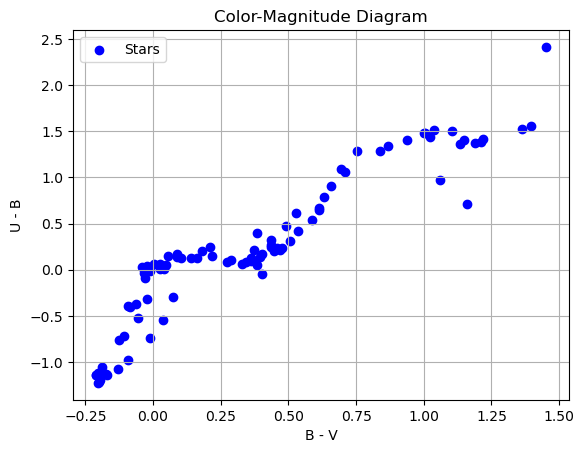

In [30]:
plt.scatter(df['B-V'], df['U-B'], c='blue', label='Stars')
plt.ylabel('U - B')
plt.xlabel('B - V')
plt.title('Color-Magnitude Diagram')
plt.grid(True)
plt.legend()
plt.show()

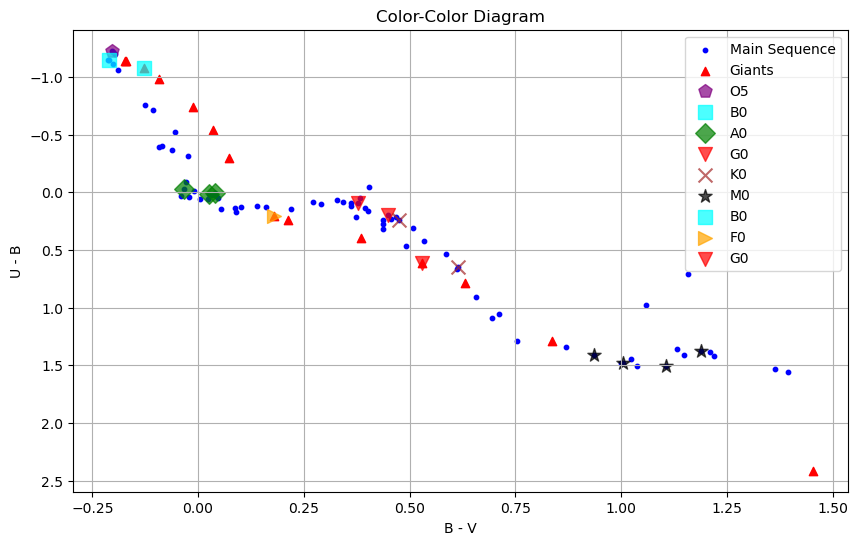

In [31]:


# Filter data by type
spectral_types = ["O5", "B0", "A0", "F0", "G0", "K0", "M0"]
main_sequence = df[df['type'].str.contains("V")]
giants = df[df['type'].str.contains("I")]


# Function to plot and label specific spectral types
def plot_spectral_types(df, spectral_types, color_dict):
    for spec_type in spectral_types:
        # Filter stars of this spectral type
        stars = df[df['type'].str.contains(spec_type)]
        if not stars.empty:
            # Plot the spectral type
            plt.scatter(stars['B-V'], stars['U-B'], label=f'{spec_type}', color=color_dict.get(spec_type), marker=shape_dict.get(spec_type), s=100,alpha=0.7)
            # Optionally add text labels for these stars
            # for index, row in stars.iterrows():
            #     plt.text(row['B-V'], row['U-B'], row['type'], fontsize=9, ha='right', color='black')

# Color dictionary for spectral types
color_dict = {
    "O5": 'purple',
    "B0": 'cyan',
    "A0": 'green',
    "F0": 'orange',
    "G0": 'red',
    "K0": 'brown',
    "M0": 'black'
}

shape_dict = {
    "O5": 'p',    # Circle
    "B0": 's',    # Square
    "A0": 'D',    # Diamond
    "F0": '>',    # Triangle (up)
    "G0": 'v',    # Triangle (down)
    "K0": 'x',    # Cross
    "M0": '*'     # Star
}

# Plot U-B vs B-V
plt.figure(figsize=(10, 6))

# Plot Main Sequence Stars
plt.scatter(main_sequence['B-V'], main_sequence['U-B'], label='Main Sequence', s=10, c='blue', marker='o')

# Plot Giants
plt.scatter(giants['B-V'], giants['U-B'], label='Giants', c='red', marker='^')

# Plot and label specific spectral types
plot_spectral_types(main_sequence, spectral_types, color_dict)
plot_spectral_types(giants, spectral_types, color_dict)

# Add labels and legend
plt.xlabel('B - V')
plt.ylabel('U - B')
plt.gca().invert_yaxis()
plt.title('Color-Color Diagram')
plt.legend()
plt.grid(True) 
plt.show()


     Temperature          U          B          V       U-B       B-V
0    2000.000000 -17.963290 -20.595653 -22.774821  2.632363  2.179168
1    2055.463198 -18.521207 -21.041953 -23.156034  2.520746  2.114081
2    2112.464479 -19.064620 -21.476707 -23.527218  2.412086  2.050511
3    2171.046497 -19.593903 -21.900209 -23.888631  2.306306  1.988423
4    2231.253088 -20.109418 -22.312744 -24.240528  2.203326  1.927783
..           ...        ...        ...        ...       ...       ...
95  26890.719092 -37.782130 -36.648142 -36.519334 -1.133988 -0.128808
96  27636.441730 -37.838589 -36.698528 -36.565895 -1.140062 -0.132633
97  28402.844449 -37.894204 -36.748274 -36.611942 -1.145930 -0.136332
98  29190.500740 -37.949002 -36.797402 -36.657493 -1.151600 -0.139909
99  30000.000000 -38.003011 -36.845931 -36.702562 -1.157080 -0.143369

[100 rows x 6 columns]


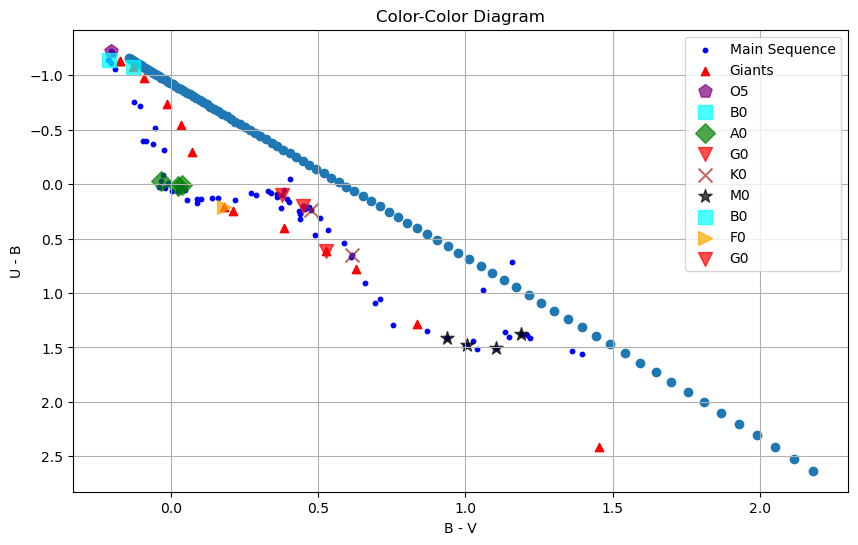

In [32]:
from astropy.constants import c, h, k_B
def blackbody_flux(wavelength, temperature):
    """Calculate blackbody flux at a given wavelength and temperature.

       wavelenth : input is in angstrom
       temperature: in Kelvin
       
       we need to convert from standard units... to ... 
    """
    # Convert wavelength from Ångströms to meters
    wavelength_m = wavelength * (1e-10)
    # Calculate the exponent for Planck's law (dimensionless)
    exponent = (h.value * c.value) / (wavelength_m * k_B.value * temperature)
    # Planck's la  w formula
    flux = (2 * h.value * c.value**2) / (wavelength_m**5 * (np.exp(exponent) - 1))
    # flux in W·m⁻²·Hz⁻¹·sr⁻¹
    flux_converted = flux *10**-9
    return flux_converted



def calculate_blackbody_magnitude(temperature, band):
    """Calculate the magnitude for a black body in a given band."""
    # Define the band limits
    lambda_min = filters[band]['lambda_0'] - filters[band]['delta_lambda'] / 2
    lambda_max = filters[band]['lambda_0'] + filters[band]['delta_lambda'] / 2
    
    band_wavelengths = np.linspace(lambda_min, lambda_max, 100)
    # Calculate blackbody flux density
    band_flux_density = blackbody_flux(band_wavelengths, temperature)
    #plt.plot(band_wavelengths, band_flux_density)
    # Integrate the flux over the band range


    # Interpolate the flux within the B-band range
    band_vega_wavelengths = np.linspace(lambda_min, lambda_max, 100)
    band_vega_converted_flux_density = np.interp(band_wavelengths, vega_wavelength, vega_converted_flux_density)

    blackbody_flux_integrated = np.trapz(band_flux_density, band_wavelengths)
    vega_flux_integrated = np.trapz(band_vega_converted_flux_density, band_vega_wavelengths)
    
    magnitude = calculate_magnitude(blackbody_flux_integrated, vega_flux_integrated)

    # Calculate the magnitude
    return magnitude


# Define temperature range
temperatures = np.logspace(3.301, 4.477, 100)  # From 2000 K to 30000 K

start_temp = 2000
stop_temp = 30000
num_points=100
# Create evenly spaced points in the exponent using base e
logspace_temperatures = np.linspace(np.log(start_temp), np.log(stop_temp), num_points)

# Convert back to the actual temperature values using the exponential function
temperatures = np.exp(logspace_temperatures)

bands = 'U' , 'B' , 'V'

# Create a dictionary to hold the results
results = {}

# Loop through temperatures and bands, calculating the magnitude
for temperature in temperatures:
    magnitudes = []
    for band in bands:
        magnitude = calculate_blackbody_magnitude(temperature, band)
        magnitudes.append(magnitude)
    results[temperature] = magnitudes

# Create a DataFrame from the results
df = pd.DataFrame.from_dict(results, orient='index', columns=bands)

# Reset the index to have Temperature as a column
df.reset_index(inplace=True)
df.rename(columns={'index': 'Temperature'}, inplace=True)

# Calculate U-B and B-V color indices
df['U-B'] = df['U'] - df['B']
df['B-V'] = df['B'] - df['V']


# Display the DataFrame
print(df)

plt.figure(figsize=(10, 6))

plt.scatter(df['B-V'] , df['U-B'] )
# Plot U-B vs B-V


# Plot Main Sequence Stars
plt.scatter(main_sequence['B-V'], main_sequence['U-B'], label='Main Sequence', s=10, c='blue', marker='o')

# Plot Giants
plt.scatter(giants['B-V'], giants['U-B'], label='Giants', c='red', marker='^')

# Plot and label specific spectral types
plot_spectral_types(main_sequence, spectral_types, color_dict)
plot_spectral_types(giants, spectral_types, color_dict)

# Add labels and legend
plt.xlabel('B - V')
plt.ylabel('U - B')
plt.gca().invert_yaxis()
plt.title('Color-Color Diagram')
plt.legend()
plt.grid(True) 
plt.show()